<a href="https://colab.research.google.com/github/semesarker/A-Dilated-Attention-U-Net-Based-Approach-on-Speech-Emotion-Recognition/blob/main/Dilated_Attention_Unet_model_on_BanglaSER_using_feature_concatenation(mfcc%26mel_spectrogram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/banglaSER/bangla-ser-database.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/banglaSER/bangla-ser-database.zip
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-02-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-01-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-01-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-02-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-01-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-03-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-02-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-03-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-01-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-03-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-01-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-01-03-01.wav  
  inflating: t9h6p943xy-5/Bangl

In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
banglaSER = "/content/t9h6p943xy-5/BanglaSER"
banglaSER_directory_list = os.listdir(banglaSER)
banglaSER_directory_list

['Actor 10',
 'Actor 17',
 'Actor 01',
 'Actor 32',
 'Actor 03',
 'Actor 12',
 'Actor 26',
 'Actor 24',
 'Actor 21',
 'Actor 16',
 'Actor 23',
 'Actor 18',
 'Actor 02',
 'Actor 05',
 'Actor 22',
 'Actor 33',
 'Actor 34',
 'Actor 19',
 'Actor 20',
 'Actor 15',
 'Actor 25',
 'Actor 09',
 'Actor 06',
 'Actor 28',
 'Actor 13',
 'Actor 31',
 'Actor 08',
 'Actor 30',
 'Actor 27',
 'Actor 14',
 'Actor 11',
 'Actor 29',
 'Actor 04',
 'Actor 07']

In [ ]:
a=list()
b=list()
c=list()
# Ravdess preprocess
banglaSER_directory_list = os.listdir(banglaSER)
file_path = []
file_emotion = []
for directory in banglaSER_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(banglaSER + '/' + directory)
    for file in actor:
        part1 = file.split('.')[0]
        # print(part1)
        part2 = part1.split('-')
        # print(part2)
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part2[2]))
        file_path.append(banglaSER + '/' + directory + '/' + file)

        a.append(banglaSER +'/'+ directory +'/'+file)
        b.append(part1)
        c.append(part2)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
banglaSER_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
banglaSER_df.Emotions.replace({1:'angry', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}, inplace=True)
banglaSER_df.head()

,Emotions,Path
0,sad,/content/t9h6p943xy-5/BanglaSER/Actor 10/03-01...
1,neutral,/content/t9h6p943xy-5/BanglaSER/Actor 10/03-01...
2,sad,/content/t9h6p943xy-5/BanglaSER/Actor 10/03-01...
3,surprise,/content/t9h6p943xy-5/BanglaSER/Actor 10/03-01...
4,surprise,/content/t9h6p943xy-5/BanglaSER/Actor 10/03-01...


In [ ]:
banglaSER_df.shape

(1467, 2)

In [ ]:
banglaSER_df.Emotions.value_counts()

sad         306
neutral     306
happy       306
angry       306
surprise    243
Name: Emotions, dtype: int64

In [ ]:
ha_mel=list()
for i in range(5):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    print(mel)
    ha_mel.append(mel)

0.014770295
0.045179013
0.16199787
0.020380745
0.059773635


In [ ]:
ha_mel=list()
for i in range(5):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    print(mel)
    ha_mel.append(mel)

0.014770295
0.045179013
0.16199787
0.020380745
0.059773635


In [ ]:
ha_mel=list()
for i in range(5):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    # print(mel)
    ha_mel.append(mel)

In [ ]:
an_mel=list()
for i in range(5):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    # print(mel)
    an_mel.append(mel)

In [ ]:
neu_mel=list()
for i in range(5):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    # print(mel)
    neu_mel.append(mel)

In [ ]:
sa_mel=list()
for i in range(5):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    # print(mel)
    sa_mel.append(mel)

In [ ]:
su_mel=list()
for i in range(5):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    # print(mel)
    su_mel.append(mel)

Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation for Different Emotions')

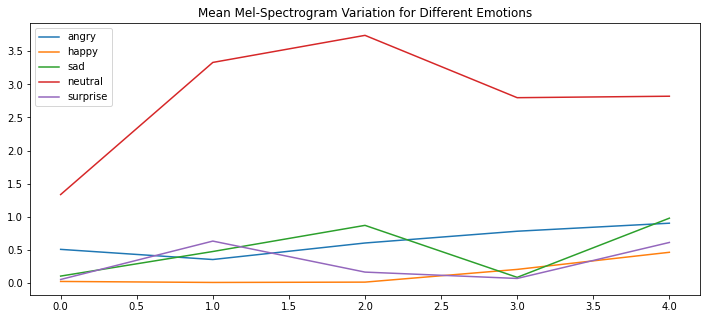

In [ ]:
mel_angry = an_mel
mel_happy= ha_mel
mel_sad= sa_mel
mel_neutral= neu_mel
mel_surprise= su_mel
plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean Mel-Spectrogram Variation for Different Emotions')

In [ ]:
ha_mel_30=list()
for i in range(10):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_hap_30=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    print(mel_hap_30)
    ha_mel_30.append(mel_hap_30)

0.114827536
0.0066436063
0.0102631
0.039112896
0.009639541
0.028500745
0.024641877
0.079361476
0.22091252
0.011257705


In [ ]:
an_mel_30=list()
for i in range(10):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_ang_30=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    print(mel_ang_30)
    an_mel_30.append(mel_ang_30)

0.17521653
0.040906943
1.3493704
0.7078114
0.3216093
0.01988122
0.12172625
1.6103007
0.21806253
0.321317


In [ ]:
neu_mel_30=list()
for i in range(10):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_neut_30=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    print(mel_neut_30)
    neu_mel_30.append(mel_neut_30)

0.72401667
0.24396792
0.43613294
0.41715905
0.4892234
1.7175192
0.79140306
0.49710706
6.0828533
1.8136284


In [ ]:
sa_mel_30=list()
for i in range(10):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_sad_30=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    print(mel_sad_30)
    sa_mel_30.append(mel_sad_30)

0.0762406
0.13603252
0.08950095
0.7929604
0.029287057
0.09351139
0.08319511
0.094659634
0.09016359
0.100413725


In [ ]:
su_mel_30=list()
for i in range(10):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_sur_30=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30).T)
    print(mel_sur_30)
    su_mel_30.append(mel_sur_30)

0.017151823
0.01833186
0.00014361554
0.03177297
0.03627042
0.043086756
0.019805713
0.012895436
0.046920754
0.026580198


Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation for Different Emotions')

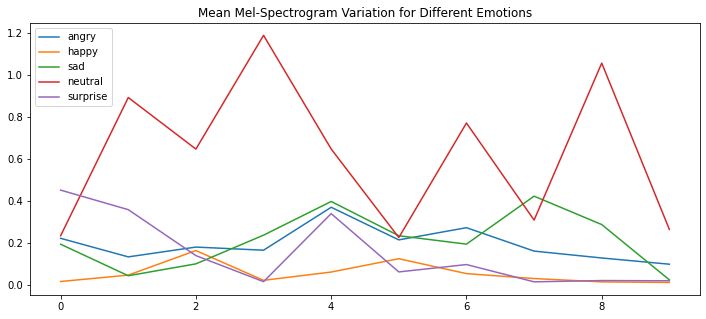

In [ ]:
mel_angry_30 = an_mel_30
mel_happy_30= ha_mel_30
mel_sad_30= sa_mel_30
mel_neutral_30= neu_mel_30
mel_surprise_30= su_mel_30
plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean Mel-Spectrogram Variation for Different Emotions')

**For 26 mel coefficient **

In [ ]:
ha_mel=list()
for i in range(10):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_1=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=26).T)
    print(mel_1)
    ha_mel.append(mel_1)

0.11531156
0.006675792
0.010303707
0.03919666
0.009687137
0.028640905
0.02476355
0.07974731
0.22159737
0.01128976


In [ ]:
an_mel=list()
for i in range(10):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_2=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=26).T)
    print(mel_2)
    an_mel.append(mel_2)

0.17595585
0.04110682
1.3558737
0.7112008
0.32317945
0.019977732
0.12232891
1.6181604
0.21913144
0.3226307


In [ ]:
neu_mel=list()
for i in range(10):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_3=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=26).T)
    print(mel_3)
    neu_mel.append(mel_3)

0.72755367
0.24514125
0.43776768
0.41917935
0.4916288
1.7258403
0.79525685
0.4994959


In [ ]:
sa_mel=list()
for i in range(10):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_4=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=26).T)
    print(mel_4)
    sa_mel.append(mel_4)

0.076616116
0.1366974
0.089942165
0.79680616
0.02943074
0.09397035
0.08360102
0.095124446
0.090603985
0.10058338


In [ ]:
su_mel=list()
for i in range(10):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_5=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=26).T)
    print(mel_5)
    su_mel.append(mel_5)

0.01722984
0.018420715
0.00014428295
0.03186166
0.036449302
0.043269362
0.019892512
0.012957799
0.04715172
0.02656982


Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation for Different Emotions')

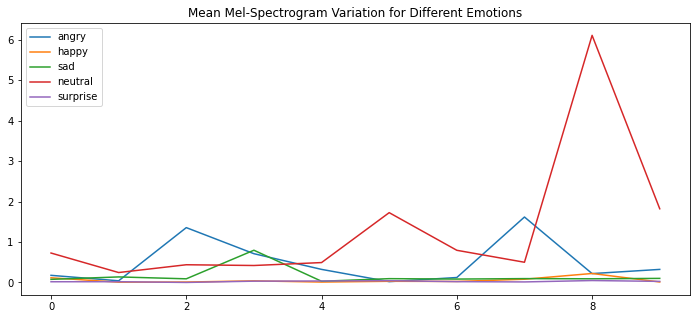

In [ ]:
mel_angry = an_mel
mel_happy= ha_mel
mel_sad= sa_mel
mel_neutral= neu_mel
mel_surprise= su_mel
plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean Mel-Spectrogram Variation for Different Emotions')

In [ ]:
ha_mel=list()
for i in range(10):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_6=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=20).T)
    print(mel_6)
    ha_mel.append(mel_6)

0.115167096
0.006745569
0.010361403
0.03938446
0.009789834
0.028925672
0.025024574
0.08050678
0.22193368
0.011349507


In [ ]:
an_mel=list()
for i in range(10):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_7=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=20).T)
    print(mel_7)
    an_mel.append(mel_7)

0.1775009
0.041552518
1.3704042
0.71873504
0.3266994
0.020193323
0.12368652
1.6358442
0.22154388
0.32440102


In [ ]:
neu_mel=list()
for i in range(10):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_8=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=20).T)
    print(mel_8)
    neu_mel.append(mel_8)

0.7353414
0.24777515
0.4411966
0.42357987
0.49696258
1.743481
0.80372596
0.50469774
6.166951
1.840293


In [ ]:
sa_mel=list()
for i in range(10):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_9=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=20).T)
    print(mel_9)
    sa_mel.append(mel_9)

0.07744445
0.13817699
0.09092858
0.8053593
0.029727347
0.094991475
0.084503934
0.09612516
0.09151953
0.09993896


In [ ]:
su_mel=list()
for i in range(10):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel_10=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=20).T)
    print(mel_10)
    su_mel.append(mel_10)

0.017301047
0.018605515
0.00014534993
0.031922266
0.03682406
0.04344887
0.019891592
0.0130923055
0.047655903
0.02654441


Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation for Different Emotions')

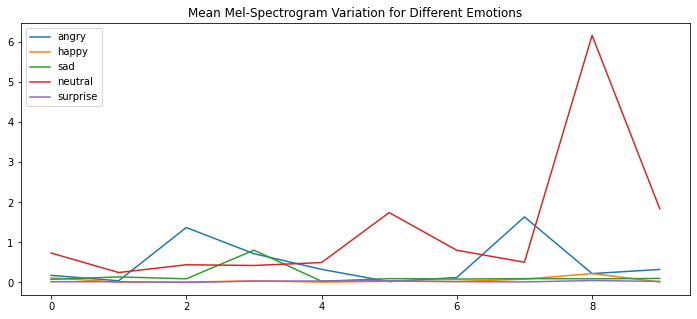

In [ ]:
mel_angry = an_mel
mel_happy= ha_mel
mel_sad= sa_mel
mel_neutral= neu_mel
mel_surprise= su_mel
plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean Mel-Spectrogram Variation for Different Emotions')

In [ ]:
ha_mel=list()
for i in range(10):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=15).T)
    print(mel)
    ha_mel.append(mel)

0.10890884
0.006803304
0.010287312
0.039250296
0.009869056
0.028897421
0.025222417
0.08040126
0.20897786
0.011295195


In [ ]:
an_mel=list()
for i in range(10):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=15).T)
    print(mel)
    an_mel.append(mel)

0.17959683
0.04169626
1.3885773
0.7277536
0.33160314
0.02048298
0.12563688
1.6610438
0.22497368
0.32730654


In [ ]:
neu_mel=list()
for i in range(10):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=15).T)
    print(mel)
    neu_mel.append(mel)

0.74195564
0.25027815
0.44359767
0.42429534
0.49663714
1.7186372
0.81523305
0.5107015
6.1692696
1.8658834


In [ ]:
sa_mel=list()
for i in range(10):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=15).T)
    print(mel)
    sa_mel.append(mel)

0.078445345
0.13954839
0.09151822
0.8154534
0.02974848
0.09634176
0.08576981
0.09660423
0.091016546
0.09640984


In [ ]:
su_mel=list()
for i in range(10):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=15).T)
    print(mel)
    su_mel.append(mel)

0.016771404
0.018558662
0.00014344488
0.030322133
0.03701566
0.041618843
0.018751225
0.013130265
0.04788776
0.026044518


Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation for Different Emotions')

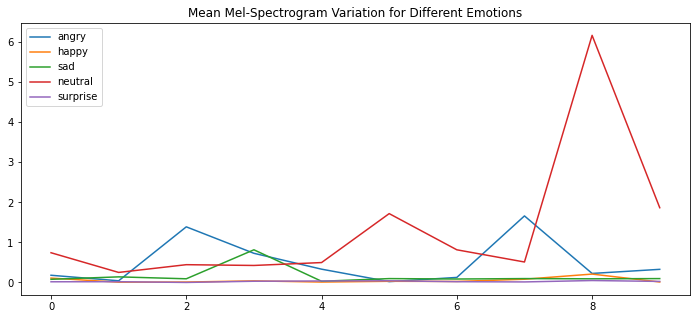

In [ ]:
mel_angry = an_mel
mel_happy= ha_mel
mel_sad= sa_mel
mel_neutral= neu_mel
mel_surprise= su_mel
plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean Mel-Spectrogram Variation for Different Emotions')

In [ ]:
ha_mel=list()
for i in range(200):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    ha_mel.append(mel)

In [ ]:
sa_mel=list()
for i in range(200):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    sa_mel.append(mel)

In [ ]:
an_mel=list()
for i in range(200):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    an_mel.append(mel)

In [ ]:
neu_mel=list()
for i in range(200):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    neu_mel.append(mel)

In [ ]:
sa_mel=list()
for i in range(200):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    sa_mel.append(mel)

In [ ]:
su_mel=list()
for i in range(200):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    su_mel.append(mel)

Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation for Different Emotions')

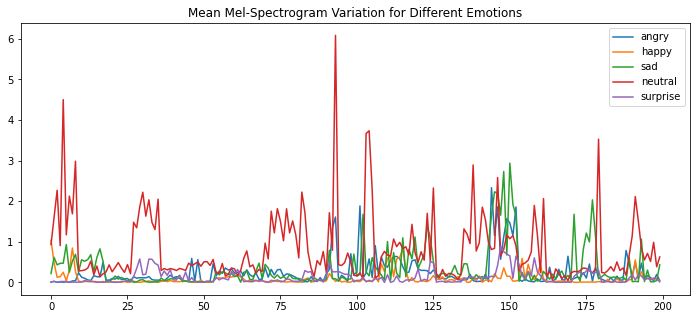

In [ ]:
mel_angry = an_mel
mel_happy= ha_mel
mel_sad= sa_mel
mel_neutral= neu_mel
mel_surprise= su_mel
plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean Mel-Spectrogram Variation for Different Emotions')

In [ ]:
ha_mf=list()
for i in range(10):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30).T))

    # print(mf)
    ha_mf.append(mf)

In [ ]:
an_mf=list()
for i in range(10):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30).T))
    # print(mf)
    an_mf.append(mf)

In [ ]:
sa_mf=list()
for i in range(10):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30).T))
    # print(mf)
    sa_mf.append(mf)

In [ ]:
su_mf=list()
for i in range(10):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30).T))
    # print(mf)
    su_mf.append(mf)

In [ ]:
nu_mf=list()
for i in range(10):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30).T))
    # print(mf)
    nu_mf.append(mf)

Text(0.5, 1.0, 'Mean MFCC Variation for Different Emotions')

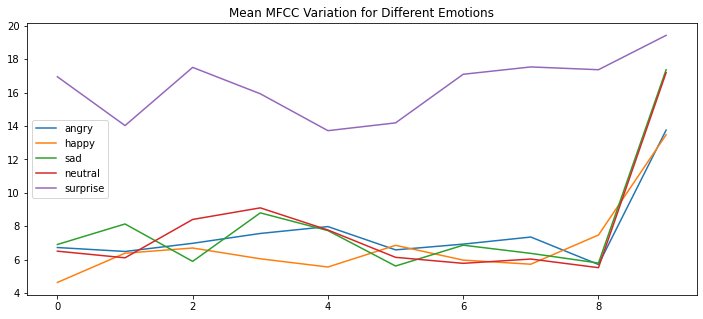

In [ ]:
mfcc_angry = an_mf
mfcc_happy= ha_mf
mfcc_sad= sa_mf
mfcc_neutral= nu_mf
mfcc_surprise= su_mf
plt.figure(figsize=(12,5))
plt.plot(mfcc_angry)
plt.plot(mfcc_happy)
plt.plot(mfcc_sad)
plt.plot(mfcc_neutral)
plt.plot(mfcc_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean MFCC Variation for Different Emotions')

In [ ]:
ha_mf=list()
for i in range(200):
    emotion='happy'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    ha_mf.append(mf)

In [ ]:
an_mf=list()
for i in range(200):
    emotion='angry'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    an_mf.append(mf)

In [ ]:
sa_mf=list()
for i in range(200):
    emotion='sad'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    sa_mf.append(mf)

In [ ]:
su_mf=list()
for i in range(200):
    emotion='surprise'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    su_mf.append(mf)

In [ ]:
nu_mf=list()
for i in range(200):
    emotion='neutral'
    path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    nu_mf.append(mf)

Text(0.5, 1.0, 'Mean MFCC Variation for Different Emotions')

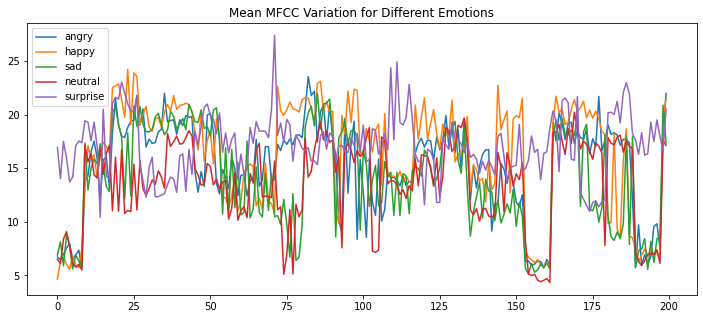

In [ ]:
mfcc_angry = an_mf
mfcc_happy= ha_mf
mfcc_sad= sa_mf
mfcc_neutral= nu_mf
mfcc_surprise= su_mf
plt.figure(figsize=(12,5))
plt.plot(mfcc_angry)
plt.plot(mfcc_happy)
plt.plot(mfcc_sad)
plt.plot(mfcc_neutral)
plt.plot(mfcc_surprise)
plt.legend(['angry','happy','sad','neutral','surprise'])
plt.title('Mean MFCC Variation for Different Emotions')

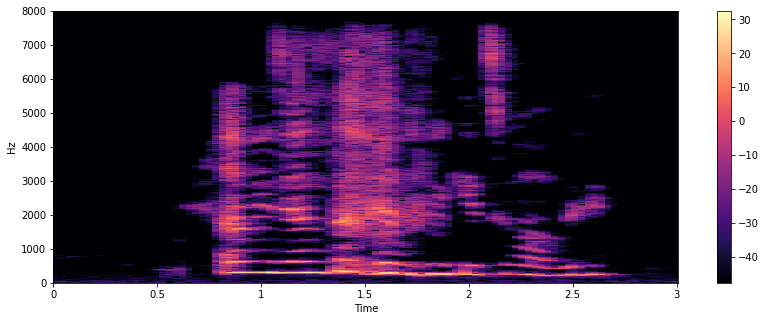

In [ ]:
emotion='angry'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[30]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

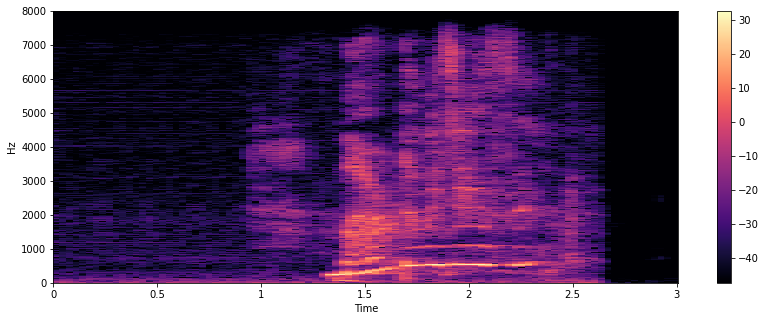

In [ ]:
emotion='sad'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[30]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048, hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

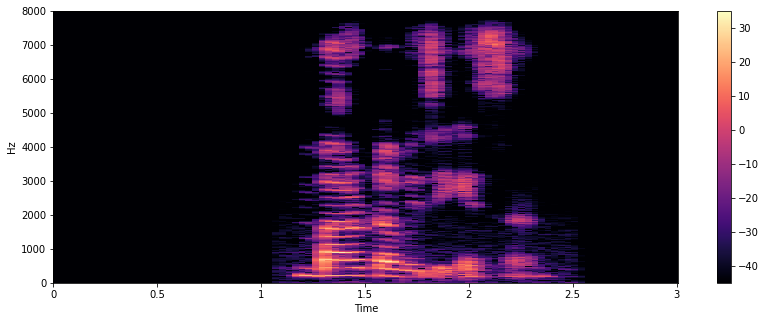

In [ ]:
emotion='surprise'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

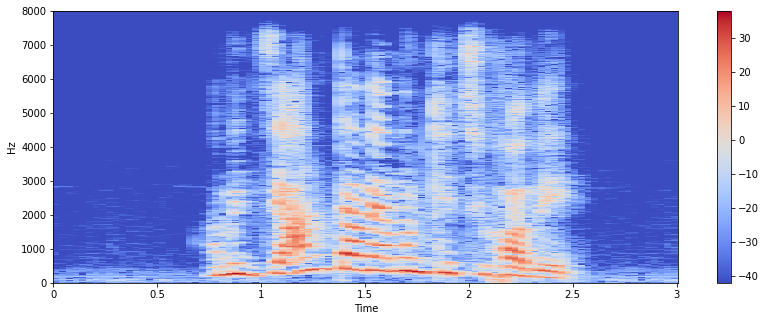

In [ ]:
emotion='neutral'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[6]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

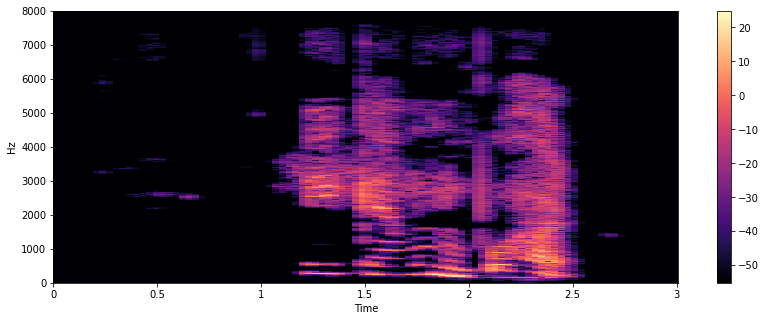

In [ ]:
emotion='happy'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[130]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=sr,n_fft=2048,hop_length=512, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

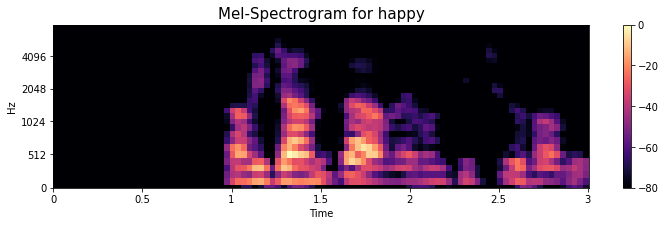

In [ ]:
emotion='happy'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[40]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

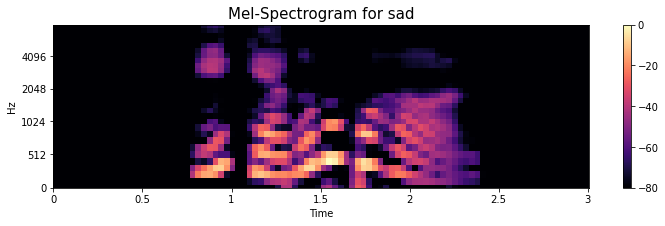

In [ ]:
emotion='sad'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

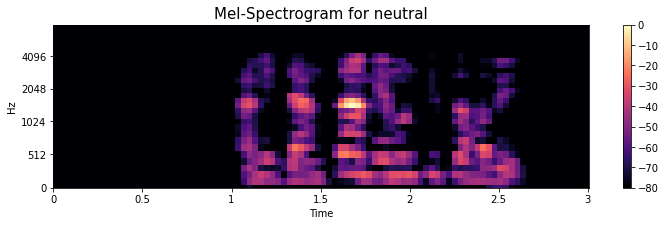

In [ ]:
emotion='neutral'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[200]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

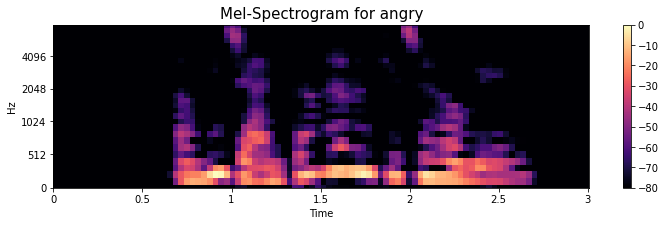

In [ ]:
emotion='angry'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
def create_mfcc(data,sr,e):
     # Random offset / Padding
    # if len(data)!= input_length:

    #     # Random offset / Padding
    #   data=match_dimension(data,40000)
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar(format='%+02.0f dB')

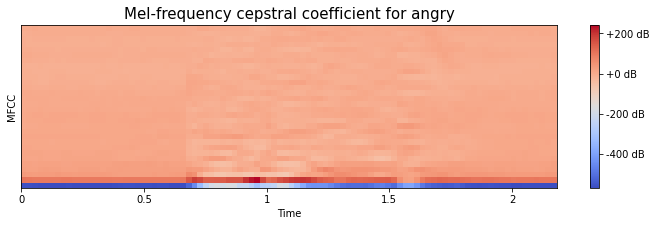

In [ ]:
emotion='angry'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)


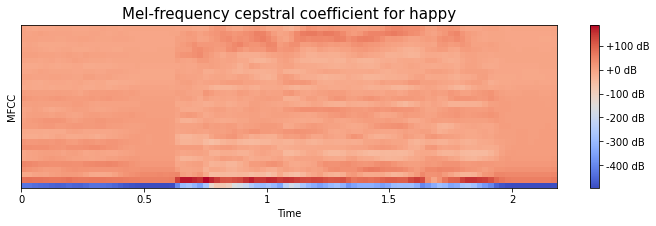

In [ ]:
emotion='happy'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)


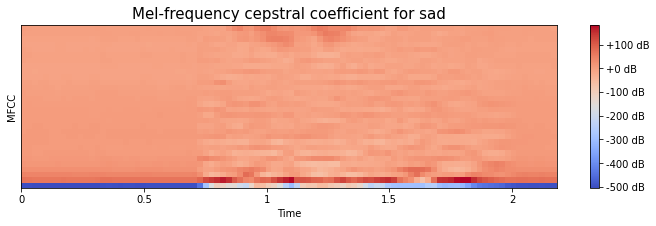

In [ ]:
emotion='sad'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)


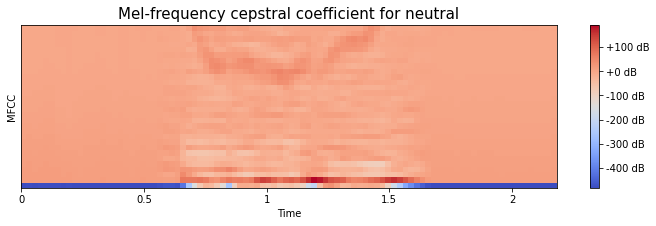

In [ ]:
emotion='neutral'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)


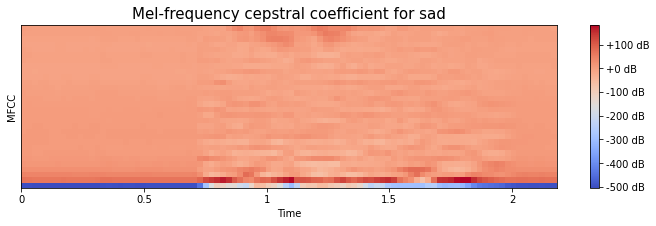

In [ ]:
emotion='sad'
path = np.array(banglaSER_df.Path[banglaSER_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)


In [ ]:
# Method 3
import scipy
from scipy.io import wavfile
sample_rate= 16000
# function to convert the information into
# some readable format
def output_duration(length):
	hours = length // 3600 # calculate in hours
	length %= 3600
	mins = length // 60 # calculate in minutes
	length %= 60
	seconds = length # calculate in seconds

	return hours, mins, seconds

# sample_rate holds the sample rate of the wav file
# in (sample/sec) format
# data is the numpy array that consists
# of actual data read from the wav file
count = 0
for r in np.array(banglaSER_df.Path):
  sample_rate, data = wavfile.read(r)

  len_data = len(data) # holds length of the numpy array

  t = len_data / sample_rate # returns duration but in floats

  hours, mins, seconds = output_duration(int(t))
  print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))
  count= count+1
print(count)

Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Dura

<ipython-input-46-198e09f56db4>:22: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(r)


Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Dura

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=3
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,94,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate

                               ,duration=3

                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,48000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate,n_fft=2048, hop_length=512, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=0)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_mfcc = prepare_data(banglaSER_df,n=60,mfcc=1,mel=1)

  0%|          | 2/1467 [00:00<03:07,  7.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 4/1467 [00:00<04:04,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 5/1467 [00:00<04:38,  5.25it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 6/1467 [00:01<05:03,  4.82it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 7/1467 [00:01<05:05,  4.79it/s]

mfcc_logspec (60, 94, 1)


  1%|          | 8/1467 [00:01<05:17,  4.59it/s]

mfcc_logspec (60, 94, 1)


  1%|          | 9/1467 [00:01<06:46,  3.58it/s]

mfcc_logspec (60, 94, 1)


  1%|          | 11/1467 [00:02<05:37,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 13/1467 [00:02<04:25,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 15/1467 [00:02<03:50,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 17/1467 [00:03<03:42,  6.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 19/1467 [00:03<03:24,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 21/1467 [00:03<03:36,  6.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 23/1467 [00:04<03:26,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 25/1467 [00:04<03:17,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 27/1467 [00:04<03:27,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 29/1467 [00:04<03:30,  6.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 31/1467 [00:05<03:22,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 33/1467 [00:05<03:36,  6.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 35/1467 [00:05<03:21,  7.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 37/1467 [00:06<03:19,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 39/1467 [00:06<03:37,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 41/1467 [00:06<03:37,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 43/1467 [00:06<03:34,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 45/1467 [00:07<03:27,  6.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 47/1467 [00:07<03:50,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 49/1467 [00:07<03:55,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 51/1467 [00:08<04:02,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 53/1467 [00:08<04:01,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 55/1467 [00:09<03:59,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 57/1467 [00:09<04:01,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 59/1467 [00:09<04:04,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 61/1467 [00:10<04:03,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 63/1467 [00:10<04:06,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 65/1467 [00:10<04:06,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 67/1467 [00:11<04:04,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 69/1467 [00:11<04:03,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 71/1467 [00:11<04:04,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 73/1467 [00:12<04:00,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 75/1467 [00:12<04:01,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 77/1467 [00:12<04:00,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 79/1467 [00:13<03:57,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 81/1467 [00:13<04:00,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 83/1467 [00:13<04:02,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 85/1467 [00:14<03:58,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 87/1467 [00:14<04:01,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 89/1467 [00:14<03:58,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 91/1467 [00:15<03:41,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 93/1467 [00:15<03:25,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 95/1467 [00:15<03:16,  7.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 97/1467 [00:16<03:08,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 99/1467 [00:16<03:07,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 101/1467 [00:16<03:35,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 103/1467 [00:16<03:17,  6.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 105/1467 [00:17<03:08,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 107/1467 [00:17<03:23,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 109/1467 [00:17<03:11,  7.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 111/1467 [00:18<03:05,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 113/1467 [00:18<03:07,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 115/1467 [00:18<03:04,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 117/1467 [00:18<03:03,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 119/1467 [00:19<03:10,  7.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 121/1467 [00:19<03:16,  6.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 123/1467 [00:19<03:21,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 125/1467 [00:20<03:07,  7.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 127/1467 [00:20<03:35,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 129/1467 [00:20<03:18,  6.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 131/1467 [00:21<03:18,  6.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 133/1467 [00:21<03:10,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 135/1467 [00:21<03:03,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 137/1467 [00:21<03:25,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 139/1467 [00:22<03:42,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 141/1467 [00:22<03:45,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 143/1467 [00:22<03:53,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 145/1467 [00:23<03:54,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 147/1467 [00:23<03:57,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 149/1467 [00:24<03:50,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 151/1467 [00:24<03:51,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 153/1467 [00:24<03:54,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 154/1467 [00:24<03:49,  5.72it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 155/1467 [00:25<04:58,  4.40it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 156/1467 [00:25<05:38,  3.87it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 157/1467 [00:25<05:54,  3.69it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 158/1467 [00:26<06:08,  3.55it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 159/1467 [00:26<06:20,  3.43it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 161/1467 [00:27<05:46,  3.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 163/1467 [00:27<04:46,  4.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 165/1467 [00:27<04:20,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 167/1467 [00:28<04:09,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 168/1467 [00:28<04:43,  4.58it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 169/1467 [00:28<04:57,  4.36it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 170/1467 [00:28<05:29,  3.93it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 171/1467 [00:29<05:52,  3.67it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 172/1467 [00:29<06:11,  3.49it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 173/1467 [00:29<06:19,  3.41it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 174/1467 [00:30<06:15,  3.44it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 175/1467 [00:30<06:18,  3.41it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 176/1467 [00:30<06:18,  3.41it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 177/1467 [00:31<06:14,  3.44it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 178/1467 [00:31<06:10,  3.48it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 179/1467 [00:31<06:11,  3.47it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 180/1467 [00:31<06:15,  3.42it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 181/1467 [00:32<06:02,  3.54it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 182/1467 [00:32<06:12,  3.45it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 183/1467 [00:32<06:22,  3.35it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 184/1467 [00:33<06:12,  3.45it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 185/1467 [00:33<06:11,  3.45it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 186/1467 [00:33<06:00,  3.55it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 187/1467 [00:33<06:03,  3.52it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 188/1467 [00:34<05:51,  3.64it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 189/1467 [00:34<05:57,  3.57it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 191/1467 [00:34<05:11,  4.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 193/1467 [00:35<04:27,  4.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 195/1467 [00:35<04:02,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 197/1467 [00:35<03:53,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 199/1467 [00:36<03:47,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 201/1467 [00:36<03:43,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 203/1467 [00:37<03:46,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 205/1467 [00:37<03:44,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 207/1467 [00:37<03:41,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 209/1467 [00:38<03:41,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 211/1467 [00:38<03:39,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 213/1467 [00:38<03:39,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 215/1467 [00:39<03:39,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 217/1467 [00:39<03:40,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 219/1467 [00:39<03:39,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 221/1467 [00:40<03:40,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 223/1467 [00:40<03:37,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 225/1467 [00:40<03:37,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 227/1467 [00:41<03:18,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 229/1467 [00:41<03:02,  6.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 231/1467 [00:41<03:04,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 233/1467 [00:42<02:54,  7.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 235/1467 [00:42<03:06,  6.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 237/1467 [00:42<03:05,  6.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 239/1467 [00:42<02:54,  7.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 241/1467 [00:43<03:06,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 243/1467 [00:43<02:55,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 245/1467 [00:43<03:07,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 247/1467 [00:44<03:05,  6.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 249/1467 [00:44<02:55,  6.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 251/1467 [00:44<03:02,  6.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 253/1467 [00:45<03:02,  6.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 255/1467 [00:45<02:53,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 257/1467 [00:45<02:51,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 259/1467 [00:45<03:03,  6.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 261/1467 [00:46<02:50,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 263/1467 [00:46<02:48,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 265/1467 [00:46<02:43,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 267/1467 [00:46<02:43,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 269/1467 [00:47<02:46,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 271/1467 [00:47<02:57,  6.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 273/1467 [00:47<03:17,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 275/1467 [00:48<03:25,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 277/1467 [00:48<03:27,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 279/1467 [00:48<03:14,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 281/1467 [00:49<03:07,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 283/1467 [00:49<03:17,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 285/1467 [00:49<03:23,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 287/1467 [00:50<03:27,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 289/1467 [00:50<03:25,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 291/1467 [00:51<03:24,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 293/1467 [00:51<03:18,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 295/1467 [00:51<03:19,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 297/1467 [00:52<03:18,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 299/1467 [00:52<03:21,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 301/1467 [00:52<03:11,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 303/1467 [00:53<03:15,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 305/1467 [00:53<03:20,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 307/1467 [00:53<03:15,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 309/1467 [00:54<03:18,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 311/1467 [00:54<03:06,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 313/1467 [00:54<03:14,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 315/1467 [00:55<03:14,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 317/1467 [00:55<02:51,  6.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 319/1467 [00:55<02:42,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 321/1467 [00:55<02:37,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 323/1467 [00:56<02:35,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 325/1467 [00:56<02:33,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 327/1467 [00:56<02:34,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 329/1467 [00:56<02:31,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 331/1467 [00:57<02:32,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 333/1467 [00:57<02:35,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 335/1467 [00:57<02:32,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 337/1467 [00:58<02:37,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 339/1467 [00:58<02:38,  7.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 341/1467 [00:58<02:38,  7.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 343/1467 [00:58<02:34,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 345/1467 [00:59<02:37,  7.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 347/1467 [00:59<02:32,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 349/1467 [00:59<02:31,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 351/1467 [00:59<02:29,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 353/1467 [01:00<02:29,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 355/1467 [01:00<02:33,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 357/1467 [01:00<02:34,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 359/1467 [01:01<02:34,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 361/1467 [01:01<02:32,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 363/1467 [01:01<02:33,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 365/1467 [01:01<02:29,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 367/1467 [01:02<02:29,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 369/1467 [01:02<02:29,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 371/1467 [01:02<02:30,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 373/1467 [01:02<02:31,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 375/1467 [01:03<02:33,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 377/1467 [01:03<02:31,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 379/1467 [01:03<02:27,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 381/1467 [01:04<02:28,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 383/1467 [01:04<02:28,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 385/1467 [01:04<02:35,  6.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 387/1467 [01:04<02:32,  7.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 389/1467 [01:05<02:29,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 391/1467 [01:05<02:27,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 393/1467 [01:05<02:26,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 395/1467 [01:06<02:27,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 397/1467 [01:06<02:29,  7.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 399/1467 [01:06<02:29,  7.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 401/1467 [01:06<02:33,  6.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 403/1467 [01:07<02:32,  7.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 405/1467 [01:07<02:27,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 407/1467 [01:07<02:27,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 409/1467 [01:08<02:25,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 411/1467 [01:08<02:25,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 413/1467 [01:08<02:30,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 415/1467 [01:08<02:29,  7.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 417/1467 [01:09<02:27,  7.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 419/1467 [01:09<02:25,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 421/1467 [01:09<02:23,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 423/1467 [01:09<02:22,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 425/1467 [01:10<02:44,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 427/1467 [01:10<02:51,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 429/1467 [01:11<02:56,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 431/1467 [01:11<02:59,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 433/1467 [01:11<03:00,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 435/1467 [01:12<03:03,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 437/1467 [01:12<03:03,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 439/1467 [01:12<03:01,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 441/1467 [01:13<02:59,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 443/1467 [01:13<02:59,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 445/1467 [01:13<03:05,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 447/1467 [01:14<03:04,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 449/1467 [01:14<03:01,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 451/1467 [01:14<03:02,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 453/1467 [01:15<03:01,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 455/1467 [01:15<02:59,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 457/1467 [01:16<02:59,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 459/1467 [01:16<02:58,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 461/1467 [01:16<02:57,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 463/1467 [01:17<02:58,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 465/1467 [01:17<03:02,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 467/1467 [01:17<03:03,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 469/1467 [01:18<02:59,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 471/1467 [01:18<02:55,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 473/1467 [01:18<02:59,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 475/1467 [01:19<03:00,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 477/1467 [01:19<02:58,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 479/1467 [01:19<02:59,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 481/1467 [01:20<02:56,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 483/1467 [01:20<02:52,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 485/1467 [01:21<02:56,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 487/1467 [01:21<02:55,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 489/1467 [01:21<02:53,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 491/1467 [01:22<03:17,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 493/1467 [01:22<03:05,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 495/1467 [01:22<02:59,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 497/1467 [01:23<03:00,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 499/1467 [01:23<02:57,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 501/1467 [01:24<02:59,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 503/1467 [01:24<02:58,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 505/1467 [01:24<02:53,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 507/1467 [01:25<02:50,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 509/1467 [01:25<02:49,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 511/1467 [01:25<02:49,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 513/1467 [01:26<02:54,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 515/1467 [01:26<02:29,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 517/1467 [01:26<02:27,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 519/1467 [01:27<02:16,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 521/1467 [01:27<02:21,  6.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 523/1467 [01:27<02:22,  6.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 525/1467 [01:27<02:20,  6.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 527/1467 [01:28<02:16,  6.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 529/1467 [01:28<02:14,  6.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 531/1467 [01:28<02:10,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 533/1467 [01:29<02:07,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 535/1467 [01:29<02:12,  7.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 537/1467 [01:29<02:10,  7.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 539/1467 [01:29<02:16,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 541/1467 [01:30<02:20,  6.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 543/1467 [01:30<02:12,  6.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 545/1467 [01:30<02:19,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 547/1467 [01:31<02:12,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 549/1467 [01:31<02:27,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 551/1467 [01:31<02:18,  6.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 553/1467 [01:32<02:12,  6.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 555/1467 [01:32<02:17,  6.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 557/1467 [01:32<02:19,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 559/1467 [01:33<02:11,  6.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 561/1467 [01:33<02:15,  6.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 563/1467 [01:33<02:09,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 565/1467 [01:33<02:04,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 567/1467 [01:34<02:02,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 569/1467 [01:34<02:14,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 571/1467 [01:34<02:17,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 573/1467 [01:35<02:11,  6.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 575/1467 [01:35<02:08,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 577/1467 [01:35<02:12,  6.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 579/1467 [01:35<02:05,  7.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 581/1467 [01:36<02:05,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 583/1467 [01:36<02:15,  6.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 585/1467 [01:36<02:17,  6.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 587/1467 [01:37<02:10,  6.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 589/1467 [01:37<02:04,  7.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 591/1467 [01:37<02:01,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 593/1467 [01:37<02:01,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 595/1467 [01:38<01:59,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 597/1467 [01:38<01:57,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 599/1467 [01:38<01:56,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 601/1467 [01:39<01:58,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 603/1467 [01:39<02:03,  7.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 605/1467 [01:39<02:01,  7.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 607/1467 [01:39<02:00,  7.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 609/1467 [01:40<01:59,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 611/1467 [01:40<02:03,  6.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 613/1467 [01:40<02:00,  7.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 615/1467 [01:41<01:59,  7.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 617/1467 [01:41<02:01,  6.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 619/1467 [01:41<02:02,  6.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 621/1467 [01:41<01:59,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 623/1467 [01:42<01:59,  7.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 625/1467 [01:42<01:57,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 627/1467 [01:42<01:57,  7.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 629/1467 [01:43<01:55,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 631/1467 [01:43<01:53,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 633/1467 [01:43<01:53,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 635/1467 [01:43<01:55,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 637/1467 [01:44<01:54,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 639/1467 [01:44<01:53,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 641/1467 [01:44<02:10,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 643/1467 [01:45<02:06,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 645/1467 [01:45<02:13,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 647/1467 [01:45<02:02,  6.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 649/1467 [01:46<02:10,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 651/1467 [01:46<02:17,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 653/1467 [01:46<02:13,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 655/1467 [01:47<02:17,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 657/1467 [01:47<02:02,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 659/1467 [01:47<02:12,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 661/1467 [01:48<02:17,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 663/1467 [01:48<02:12,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 665/1467 [01:48<02:09,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 667/1467 [01:48<02:06,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 669/1467 [01:49<02:07,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 671/1467 [01:49<02:06,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 673/1467 [01:49<02:15,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 675/1467 [01:50<02:21,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 677/1467 [01:50<02:21,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 679/1467 [01:51<02:14,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 681/1467 [01:51<02:15,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 683/1467 [01:51<02:17,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 685/1467 [01:52<02:20,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 687/1467 [01:52<02:19,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 689/1467 [01:52<02:19,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 691/1467 [01:53<02:18,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 693/1467 [01:53<02:17,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 695/1467 [01:53<02:19,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 697/1467 [01:54<02:18,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 699/1467 [01:54<02:21,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 701/1467 [01:55<02:18,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 703/1467 [01:55<02:17,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 705/1467 [01:55<02:15,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 707/1467 [01:56<02:15,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 709/1467 [01:56<02:15,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 711/1467 [01:56<02:13,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 713/1467 [01:57<02:12,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 715/1467 [01:57<02:13,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 717/1467 [01:57<02:12,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 719/1467 [01:58<02:11,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 721/1467 [01:58<02:10,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 723/1467 [01:58<02:09,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 725/1467 [01:59<02:10,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 727/1467 [01:59<02:13,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 729/1467 [02:00<02:13,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 731/1467 [02:00<02:12,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 733/1467 [02:00<02:13,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 735/1467 [02:01<02:13,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 737/1467 [02:01<02:09,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 739/1467 [02:01<02:13,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 741/1467 [02:02<02:12,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 743/1467 [02:02<02:13,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 745/1467 [02:02<02:10,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 747/1467 [02:03<02:10,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 749/1467 [02:03<02:10,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 751/1467 [02:03<02:05,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 753/1467 [02:04<02:03,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 755/1467 [02:04<02:03,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 757/1467 [02:05<02:03,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 759/1467 [02:05<02:03,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 761/1467 [02:05<02:04,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 763/1467 [02:06<02:06,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 765/1467 [02:06<02:07,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 767/1467 [02:06<02:05,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 769/1467 [02:07<02:07,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 771/1467 [02:07<02:03,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 773/1467 [02:07<02:03,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 775/1467 [02:08<02:02,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 777/1467 [02:08<02:01,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 779/1467 [02:08<01:59,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 781/1467 [02:09<02:00,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 783/1467 [02:09<02:00,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 785/1467 [02:10<02:01,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 787/1467 [02:10<02:01,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 789/1467 [02:10<02:00,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 791/1467 [02:11<01:57,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 793/1467 [02:11<01:58,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 795/1467 [02:11<02:00,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 797/1467 [02:12<01:59,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 799/1467 [02:12<02:00,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 801/1467 [02:12<01:59,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 803/1467 [02:13<01:57,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 805/1467 [02:13<01:57,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 807/1467 [02:13<01:56,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 809/1467 [02:14<01:55,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 811/1467 [02:14<01:57,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 813/1467 [02:15<01:57,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 815/1467 [02:15<01:55,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 817/1467 [02:15<01:55,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 819/1467 [02:16<01:53,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 821/1467 [02:16<01:57,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 823/1467 [02:16<01:56,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 825/1467 [02:17<01:55,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 827/1467 [02:17<01:42,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 829/1467 [02:17<01:41,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 831/1467 [02:18<01:46,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 833/1467 [02:18<01:41,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 835/1467 [02:18<01:42,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 837/1467 [02:19<01:37,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 839/1467 [02:19<01:43,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 841/1467 [02:19<01:44,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 843/1467 [02:20<01:49,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 845/1467 [02:20<01:49,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 847/1467 [02:20<01:50,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 849/1467 [02:21<01:43,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 851/1467 [02:21<01:45,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 853/1467 [02:21<01:47,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 855/1467 [02:22<01:48,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 857/1467 [02:22<01:35,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 859/1467 [02:22<01:29,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 861/1467 [02:23<01:26,  7.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 863/1467 [02:23<01:23,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 865/1467 [02:23<01:21,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 867/1467 [02:23<01:22,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 869/1467 [02:24<01:21,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 871/1467 [02:24<01:22,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 873/1467 [02:24<01:22,  7.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 875/1467 [02:24<01:21,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 877/1467 [02:25<01:20,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 879/1467 [02:25<01:19,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 881/1467 [02:25<01:21,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 883/1467 [02:26<01:21,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 885/1467 [02:26<01:19,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 887/1467 [02:26<01:17,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 889/1467 [02:26<01:18,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 891/1467 [02:27<01:17,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 893/1467 [02:27<01:17,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 895/1467 [02:27<01:16,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 897/1467 [02:27<01:18,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 899/1467 [02:28<01:17,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 901/1467 [02:28<01:22,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 903/1467 [02:28<01:31,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 905/1467 [02:29<01:34,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 907/1467 [02:29<01:36,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 909/1467 [02:29<01:38,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 911/1467 [02:30<01:39,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 913/1467 [02:30<01:39,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 915/1467 [02:31<01:40,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 917/1467 [02:31<01:38,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 919/1467 [02:31<01:37,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 921/1467 [02:32<01:37,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 923/1467 [02:32<01:36,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 925/1467 [02:32<01:39,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 927/1467 [02:33<01:38,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 929/1467 [02:33<01:36,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 931/1467 [02:33<01:35,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 933/1467 [02:34<01:33,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 935/1467 [02:34<01:33,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 937/1467 [02:34<01:36,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 939/1467 [02:35<01:33,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 941/1467 [02:35<01:31,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 943/1467 [02:36<01:31,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 945/1467 [02:36<01:33,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 947/1467 [02:36<01:32,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 949/1467 [02:37<01:34,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 951/1467 [02:37<01:34,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 953/1467 [02:37<01:32,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 955/1467 [02:38<01:32,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 957/1467 [02:38<01:29,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 959/1467 [02:38<01:32,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 961/1467 [02:39<01:30,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 963/1467 [02:39<01:31,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 965/1467 [02:40<01:30,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 967/1467 [02:40<01:29,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 969/1467 [02:40<01:28,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 971/1467 [02:41<01:31,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 973/1467 [02:41<01:31,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 975/1467 [02:41<01:28,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 977/1467 [02:42<01:27,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 979/1467 [02:42<01:28,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 981/1467 [02:42<01:27,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 983/1467 [02:43<01:26,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 985/1467 [02:43<01:25,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 987/1467 [02:43<01:26,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 989/1467 [02:44<01:25,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 991/1467 [02:44<01:18,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 993/1467 [02:44<01:10,  6.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 995/1467 [02:45<01:08,  6.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 997/1467 [02:45<01:07,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 999/1467 [02:45<01:05,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 1001/1467 [02:46<01:03,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 1003/1467 [02:46<01:03,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 1005/1467 [02:46<01:03,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 1007/1467 [02:46<01:02,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 1009/1467 [02:47<01:02,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 1011/1467 [02:47<01:02,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 1013/1467 [02:47<01:01,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 1015/1467 [02:47<01:01,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 1017/1467 [02:48<01:01,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 1019/1467 [02:48<01:02,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1021/1467 [02:48<01:02,  7.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1023/1467 [02:49<01:02,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1025/1467 [02:49<01:02,  7.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1027/1467 [02:49<01:01,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1029/1467 [02:49<01:00,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1031/1467 [02:50<01:01,  7.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1033/1467 [02:50<01:00,  7.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1035/1467 [02:50<01:00,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1037/1467 [02:51<00:59,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1039/1467 [02:51<01:00,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1041/1467 [02:51<01:05,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1043/1467 [02:51<01:01,  6.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1045/1467 [02:52<01:03,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 1047/1467 [02:52<01:01,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1049/1467 [02:52<01:04,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1051/1467 [02:53<01:01,  6.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1053/1467 [02:53<00:59,  7.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1055/1467 [02:53<01:03,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1057/1467 [02:54<01:03,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1059/1467 [02:54<01:04,  6.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1061/1467 [02:54<01:00,  6.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1063/1467 [02:54<01:07,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1065/1467 [02:55<01:03,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1067/1467 [02:55<01:00,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1069/1467 [02:55<01:00,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1071/1467 [02:56<00:57,  6.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1073/1467 [02:56<00:55,  7.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1075/1467 [02:56<01:02,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1077/1467 [02:57<01:01,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 1079/1467 [02:57<00:59,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 1081/1467 [02:57<01:04,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1083/1467 [02:58<01:03,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1085/1467 [02:58<00:57,  6.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1087/1467 [02:58<01:00,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1089/1467 [02:59<00:59,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1091/1467 [02:59<00:58,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1093/1467 [02:59<00:56,  6.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1095/1467 [02:59<00:59,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1097/1467 [03:00<01:03,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1099/1467 [03:00<01:02,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1101/1467 [03:01<01:04,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1103/1467 [03:01<00:56,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1105/1467 [03:01<00:53,  6.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1107/1467 [03:01<00:54,  6.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1109/1467 [03:02<00:51,  6.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1111/1467 [03:02<00:57,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1113/1467 [03:02<00:56,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1115/1467 [03:03<00:51,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1117/1467 [03:03<00:50,  6.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 1119/1467 [03:03<00:49,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 1121/1467 [03:03<00:47,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1123/1467 [03:04<00:47,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1125/1467 [03:04<00:47,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1127/1467 [03:04<00:46,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1129/1467 [03:05<00:45,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1131/1467 [03:05<00:46,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1133/1467 [03:05<00:46,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1135/1467 [03:05<00:46,  7.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1137/1467 [03:06<00:47,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1139/1467 [03:06<00:45,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1141/1467 [03:06<00:45,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1143/1467 [03:07<00:45,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1145/1467 [03:07<00:44,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1147/1467 [03:07<00:44,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1149/1467 [03:07<00:44,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1151/1467 [03:08<00:43,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 1153/1467 [03:08<00:47,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 1155/1467 [03:08<00:52,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1157/1467 [03:09<00:55,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1159/1467 [03:09<00:54,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1161/1467 [03:09<00:55,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1163/1467 [03:10<00:55,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1165/1467 [03:10<00:54,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1167/1467 [03:11<00:54,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1169/1467 [03:11<00:53,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1171/1467 [03:11<00:53,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1173/1467 [03:12<00:53,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1175/1467 [03:12<00:51,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1177/1467 [03:12<00:50,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1179/1467 [03:13<00:50,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1181/1467 [03:13<00:49,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1183/1467 [03:13<00:50,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1185/1467 [03:14<00:49,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1187/1467 [03:14<00:48,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1189/1467 [03:14<00:48,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1191/1467 [03:15<00:48,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 1193/1467 [03:15<00:48,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 1195/1467 [03:15<00:48,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1197/1467 [03:16<00:48,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1199/1467 [03:16<00:48,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1201/1467 [03:17<00:47,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1203/1467 [03:17<00:46,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1205/1467 [03:17<00:45,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1207/1467 [03:18<00:46,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1209/1467 [03:18<00:46,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1211/1467 [03:18<00:46,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1213/1467 [03:19<00:45,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1215/1467 [03:19<00:44,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1217/1467 [03:19<00:44,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1219/1467 [03:20<00:44,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1221/1467 [03:20<00:43,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1223/1467 [03:20<00:42,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 1225/1467 [03:21<00:43,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 1227/1467 [03:21<00:41,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1229/1467 [03:22<00:40,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1231/1467 [03:22<00:41,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1233/1467 [03:22<00:40,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1235/1467 [03:23<00:42,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1237/1467 [03:23<00:41,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1239/1467 [03:23<00:41,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1241/1467 [03:24<00:40,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1243/1467 [03:24<00:40,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1245/1467 [03:24<00:40,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1247/1467 [03:25<00:40,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1249/1467 [03:25<00:39,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1251/1467 [03:26<00:38,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1253/1467 [03:26<00:38,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1255/1467 [03:26<00:38,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1257/1467 [03:27<00:37,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1259/1467 [03:27<00:37,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1261/1467 [03:27<00:37,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1263/1467 [03:28<00:36,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1265/1467 [03:28<00:36,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 1267/1467 [03:28<00:35,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1269/1467 [03:29<00:35,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1271/1467 [03:29<00:34,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1273/1467 [03:29<00:33,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1275/1467 [03:30<00:33,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1277/1467 [03:30<00:33,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1279/1467 [03:31<00:33,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1281/1467 [03:31<00:32,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1283/1467 [03:31<00:32,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1285/1467 [03:32<00:31,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1287/1467 [03:32<00:31,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1289/1467 [03:32<00:31,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1291/1467 [03:33<00:30,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1293/1467 [03:33<00:30,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1295/1467 [03:33<00:29,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1297/1467 [03:34<00:28,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 1299/1467 [03:34<00:29,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 1301/1467 [03:34<00:28,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1303/1467 [03:35<00:26,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1305/1467 [03:35<00:24,  6.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1307/1467 [03:35<00:24,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1309/1467 [03:36<00:25,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1311/1467 [03:36<00:25,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1313/1467 [03:36<00:26,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1315/1467 [03:37<00:24,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1317/1467 [03:37<00:24,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1319/1467 [03:37<00:23,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1321/1467 [03:37<00:23,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1323/1467 [03:38<00:22,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1325/1467 [03:38<00:23,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1327/1467 [03:39<00:23,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1329/1467 [03:39<00:24,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1331/1467 [03:39<00:24,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1333/1467 [03:40<00:23,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1335/1467 [03:40<00:23,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1337/1467 [03:40<00:23,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 1339/1467 [03:41<00:22,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 1341/1467 [03:41<00:22,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1343/1467 [03:41<00:22,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1345/1467 [03:42<00:21,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1347/1467 [03:42<00:22,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1349/1467 [03:42<00:21,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1351/1467 [03:43<00:20,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1353/1467 [03:43<00:20,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1355/1467 [03:44<00:19,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1357/1467 [03:44<00:19,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1359/1467 [03:44<00:19,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1361/1467 [03:45<00:19,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1363/1467 [03:45<00:18,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1365/1467 [03:45<00:18,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1367/1467 [03:46<00:18,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1369/1467 [03:46<00:17,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1371/1467 [03:46<00:17,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 1373/1467 [03:47<00:16,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 1375/1467 [03:47<00:16,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1377/1467 [03:48<00:15,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1379/1467 [03:48<00:13,  6.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1381/1467 [03:48<00:12,  7.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1383/1467 [03:48<00:12,  6.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1385/1467 [03:49<00:11,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1387/1467 [03:49<00:11,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1389/1467 [03:49<00:11,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1391/1467 [03:50<00:11,  6.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1393/1467 [03:50<00:11,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1395/1467 [03:50<00:11,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1397/1467 [03:50<00:10,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1399/1467 [03:51<00:10,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1401/1467 [03:51<00:10,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1403/1467 [03:51<00:09,  6.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1405/1467 [03:52<00:08,  7.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1407/1467 [03:52<00:08,  6.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1409/1467 [03:52<00:08,  6.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1411/1467 [03:52<00:08,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 1413/1467 [03:53<00:07,  6.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 1415/1467 [03:53<00:07,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1417/1467 [03:53<00:07,  6.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1419/1467 [03:54<00:07,  6.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1421/1467 [03:54<00:07,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1423/1467 [03:54<00:07,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1425/1467 [03:55<00:06,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1427/1467 [03:55<00:06,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1429/1467 [03:55<00:05,  6.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1431/1467 [03:55<00:05,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1433/1467 [03:56<00:05,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1435/1467 [03:56<00:04,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1437/1467 [03:56<00:04,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1439/1467 [03:57<00:03,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1441/1467 [03:57<00:03,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1443/1467 [03:57<00:03,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 1445/1467 [03:57<00:03,  6.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 1447/1467 [03:58<00:03,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1449/1467 [03:58<00:02,  6.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1451/1467 [03:58<00:02,  7.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1453/1467 [03:59<00:02,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1455/1467 [03:59<00:01,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1457/1467 [03:59<00:01,  7.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1459/1467 [04:00<00:01,  7.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 1461/1467 [04:00<00:00,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 1463/1467 [04:00<00:00,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 1465/1467 [04:00<00:00,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|██████████| 1467/1467 [04:01<00:00,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(banglaSER_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1462,0.0,0.0,0.0,0.0,1.0
1463,0.0,0.0,0.0,0.0,1.0
1464,0.0,0.0,0.0,1.0,0.0
1465,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(mel_mfcc
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True

                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1173, 60, 94, 1) (59, 60, 94, 1) (235, 60, 94, 1) (1173, 5) (59, 5) (235, 5)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1173, 60, 94, 1) (59, 60, 94, 1) (235, 60, 94, 1) (1173, 5) (59, 5) (235, 5)


In [ ]:
y_train.nunique()

Emotions_angry       2
Emotions_happy       2
Emotions_neutral     2
Emotions_sad         2
Emotions_surprise    2
dtype: int64

In [ ]:
y_train.Emotions_angry.unique()

array([1., 0.])

In [ ]:
y_train.Emotions_happy.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_neutral.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_sad.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_surprise.unique()

array([0., 1.])

In [ ]:
y_val.nunique()

Emotions_angry       2
Emotions_happy       2
Emotions_neutral     2
Emotions_sad         2
Emotions_surprise    2
dtype: int64

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
class AttentionGate(Layer):

    def __init__(self, filters, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.normal = Conv2D(filters, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', activation='relu')
        self.add = Add()
        self.resample = UpSampling2D()
        self.learn = Conv2D(1,kernel_size=1, padding='same', activation='sigmoid')
        self.adapt = Multiply()

    def call(self, X):
        X, skip_X = X
        x = self.normal(X)
        skip = self.down(skip_X)
        x = self.add([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = self.adapt([x,skip_X])
        return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'filters':self.filters,
            }



In [ ]:
def dilated_attention_unet():
    x_input = Input(shape =(60,94, 1))
    print(x_input)

    conv_1 = Conv2D(32, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(x_input)
    print('CONV1',conv_1.shape)
    drop_1 = Dropout(0.5)(conv_1)
    print('drop1',drop_1.shape)
    pool_1 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_1)
    print('pool_1',pool_1.shape)

    conv_2 = Conv2D(64, 3,padding='same',dilation_rate=4,  activation = LeakyReLU(alpha=0.1))(pool_1)
    print('CONV2',conv_2.shape)
    conv_2_final= tf.pad(conv_2,((0,0), (0,0), (0,1), (0,0)))
    print('CONV2_final',conv_2_final.shape)

    pool_2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_2_final)
    print('pool_2',pool_2.shape)

    conv_3 = Conv2D(128, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_2)
    print('CONV3',conv_3.shape)
    conv_3_final= tf.pad(conv_3,((0,0), (0,1), (0,0), (0,0)))
    print('CONV3_final',conv_3_final.shape)

    pool_3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_3_final)
    print('pool_3',pool_3.shape)

    conv_4 = Conv2D(256, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_3)
    print('CONV4',conv_4.shape)
    pool_4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_4)
    print('pool_4',pool_4.shape)

    conv_5 = Conv2D(512, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_4)
    print('CONV5',conv_5.shape)
    drop_5 = Dropout(0.5)(conv_5)
    print('drop5',drop_5.shape)
    pool_5 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_5)
    print('pool_5',pool_5.shape)


    conv_6 = Conv2D(1024, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_5)
    print('CONV6',conv_6.shape)
    drop_6 = Dropout(0.5)(conv_6)
    print('drop6',drop_6.shape)

    a1 = AttentionGate(512, name="Attention1")([drop_6, drop_5])
    print('A1',a1.shape)
    up7a =Conv2DTranspose(filters=512,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(drop_6)
    print('De-Conv1',up7a.shape)
    up7b = Concatenate(axis=3)([up7a, a1])
    print('concatenate_up7b',up7b.shape)
    conv_8 = Conv2D(filters=512,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up7b)
    print('conv8',conv_8.shape)

    a2 = AttentionGate(256, name="Attention2")([conv_8, conv_4])
    print('A2',a2.shape)
    up9a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_8)
    print('De-Conv2',up9a.shape)
    up9b = Concatenate(axis=3)([a2, up9a])
    print('concatenate_up9b',up9b.shape)
    conv_10 = Conv2D(filters=256,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up9b)
    print('conv10',conv_10.shape)

    a3 = AttentionGate(128, name="Attention3")([conv_10, conv_3_final])
    print('A3',a3.shape)
    up11a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_10)
    print('De-Conv3',up11a.shape)
    up11b = Concatenate(axis=3)([a3, up11a])
    print('concatenate_up11b',up11b.shape)
    conv_12 = Conv2D(filters=128,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up11b)
    print('conv12',conv_12.shape)
    conv_12_crop=tf.keras.layers.Cropping2D(cropping=((1,0), (0,0)))(conv_12)
    print('conv_12_crop',conv_12_crop.shape)

    a4 = AttentionGate(64, name="Attention4")([conv_12_crop, conv_2_final])
    print('A4',a4.shape)
    up13a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_12_crop)
    print('De-Conv4',up13a.shape)
    up13b = Concatenate(axis=3)([a4, up13a])
    print('concatenate_up13b',up13b.shape)
    conv_14 = Conv2D(filters=64,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up13b)
    print('conv14',conv_14.shape)
    conv_14_crop = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(conv_14)
    print('conv14_crop',conv_14_crop.shape)

    a5 = AttentionGate(32, name="Attention5")([conv_14_crop, drop_1])
    print('A5',a5.shape)
    up15a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_14_crop)
    print('De-Conv5',up15a.shape)
    up15b = Concatenate(axis=3)([a5, up15a])
    print('concatenate_up15b',up15b.shape)
    conv_16 = Conv2D(filters=32,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up15b)
    print('conv16',conv_16.shape)

    flat_1 = Flatten()(conv_16)
    den_1= Dense(5, activation='softmax')(flat_1)
    print(den_1.shape)



    model = Model(inputs=x_input, outputs=den_1)
    return model

In [ ]:
model=dilated_attention_unet()
print(model)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 60, 94, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
CONV1 (None, 60, 94, 32)
drop1 (None, 60, 94, 32)
pool_1 (None, 30, 47, 32)
CONV2 (None, 30, 47, 64)
CONV2_final (None, 30, 48, 64)
pool_2 (None, 15, 24, 64)
CONV3 (None, 15, 24, 128)
CONV3_final (None, 16, 24, 128)
pool_3 (None, 8, 12, 128)
CONV4 (None, 8, 12, 256)
pool_4 (None, 4, 6, 256)
CONV5 (None, 4, 6, 512)
drop5 (None, 4, 6, 512)
pool_5 (None, 2, 3, 512)
CONV6 (None, 2, 3, 1024)
drop6 (None, 2, 3, 1024)
A1 (None, 4, 6, 512)
De-Conv1 (None, 4, 6, 512)
concatenate_up7b (None, 4, 6, 1024)
conv8 (None, 4, 6, 512)
A2 (None, 8, 12, 256)
De-Conv2 (None, 8, 12, 256)
concatenate_up9b (None, 8, 12, 512)
conv10 (None, 8, 12, 256)
A3 (None, 16, 24, 128)
De-Conv3 (None, 16, 24, 128)
concatenate_up11b (None, 16, 24, 256)
conv12 (None, 16, 24, 128)
conv_12_crop (None, 15, 24, 128)
A4 (None, 30, 48, 64)
De-Conv4 (None, 30, 48, 64)
concatenate_up

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 1.5724 - accuracy: 0.3478
Epoch 1: val_accuracy improved from -inf to 0.43404, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
19/19 [==============================] - 21s 448ms/step - loss: 1.5724 - accuracy: 0.3478 - val_loss: 1.3098 - val_accuracy: 0.4340
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.0627 - accuracy: 0.5737
Epoch 2: val_accuracy improved from 0.43404 to 0.62128, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
19/19 [==============================] - 4s 182ms/step - loss: 1.0627 - accuracy: 0.5737 - val_loss: 0.9858 - val_accuracy: 0.6213
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.6463 - accuracy: 0.7639
Epoch 3: val_accuracy improved from 0.62128 to 0.67660, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
19/19 [=========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

2/2 [==============================] - 1s 649ms/step - loss: 2.1424 - accuracy: 0.7627
Accuracy of our model on test data :  76.27118825912476 %


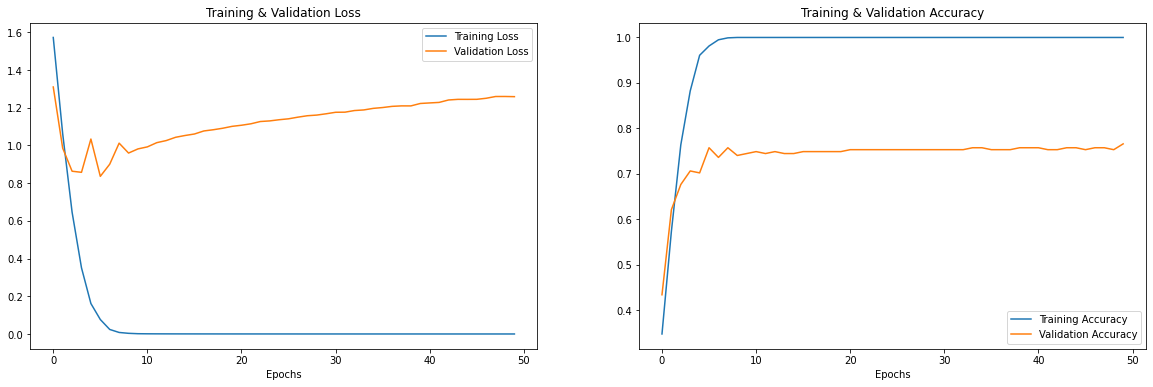

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

2/2 [==============================] - 0s 38ms/step


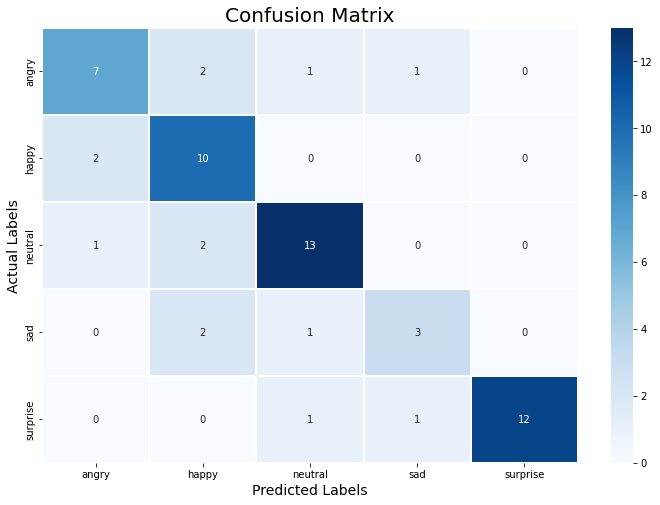

              precision    recall  f1-score   support

       angry       0.70      0.64      0.67        11
       happy       0.62      0.83      0.71        12
     neutral       0.81      0.81      0.81        16
         sad       0.60      0.50      0.55         6
    surprise       1.00      0.86      0.92        14

    accuracy                           0.76        59
   macro avg       0.75      0.73      0.73        59
weighted avg       0.78      0.76      0.76        59



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))

**using kL Loss**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = 'kullback_leibler_divergence' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=70,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/70
19/19 [==============================] - ETA: 0s - loss: 1.3538 - accuracy: 0.4109
Epoch 1: val_accuracy improved from -inf to 0.51489, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
19/19 [==============================] - 10s 281ms/step - loss: 1.3538 - accuracy: 0.4109 - val_loss: 1.2251 - val_accuracy: 0.5149
Epoch 2/70
19/19 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.6070
Epoch 2: val_accuracy improved from 0.51489 to 0.59574, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
19/19 [==============================] - 4s 191ms/step - loss: 1.0411 - accuracy: 0.6070 - val_loss: 1.0229 - val_accuracy: 0.5957
Epoch 3/70
19/19 [==============================] - ETA: 0s - loss: 0.7191 - accuracy: 0.7315
Epoch 3: val_accuracy improved from 0.59574 to 0.64681, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
19/19 [=========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

2/2 [==============================] - 0s 41ms/step - loss: 1.3786 - accuracy: 0.7458
Accuracy of our model on test data :  74.57627058029175 %


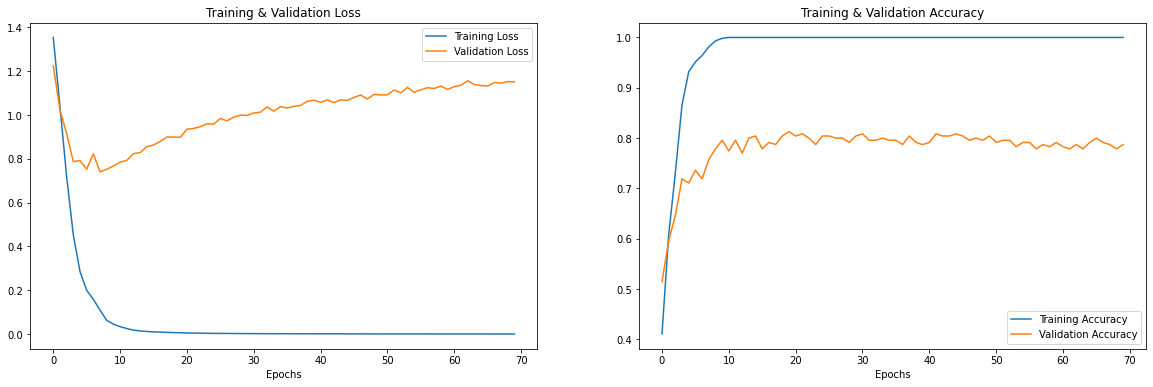

In [ ]:
epochs = [i for i in range(70)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

2/2 [==============================] - 0s 39ms/step


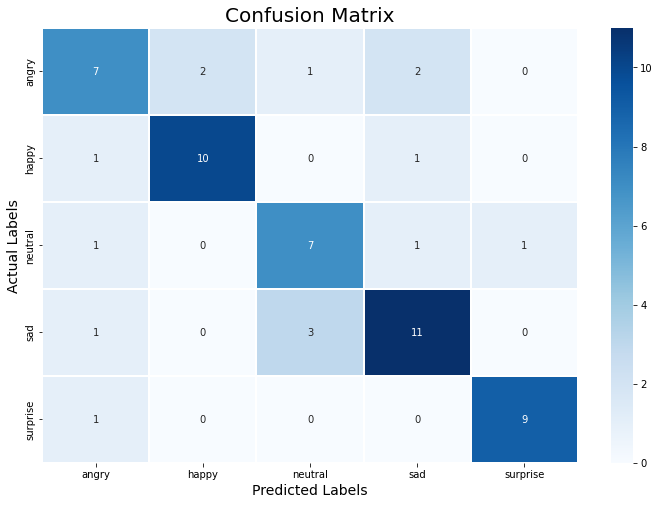

              precision    recall  f1-score   support

       angry       0.64      0.58      0.61        12
       happy       0.83      0.83      0.83        12
     neutral       0.64      0.70      0.67        10
         sad       0.73      0.73      0.73        15
    surprise       0.90      0.90      0.90        10

    accuracy                           0.75        59
   macro avg       0.75      0.75      0.75        59
weighted avg       0.75      0.75      0.75        59



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))